<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/201228_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=fJ3CfEwr39k
# Description: Create and plot multiple technical indicators

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as pdr

In [37]:
ticker = 'TSLA'
start_date = '2019-11-25'
end_date = '2020-11-23'
df = pdr.DataReader(ticker, 'yahoo', start_date, end_date)

In [39]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-25,68.914001,66.891998,68.863998,67.267998,61697500.0,67.267998
2019-11-26,67.099998,65.419998,67.054001,65.783997,39737000.0,65.783997
2019-11-27,66.786003,65.713997,66.223999,66.258003,27778000.0,66.258003
2019-11-29,66.251999,65.500000,66.222000,65.987999,12328000.0,65.987999
2019-12-02,67.276001,65.737999,65.879997,66.973999,30372500.0,66.973999


In [40]:
# check the dataframe index
df.index

DatetimeIndex(['2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09',
               ...
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [41]:
# Create functions to calculate SMA and EMA

# Create the SImple Moving Average (SMA)
def SMA(data, period=20, column='Close'):
  return data[column].rolling(window=period).mean()

# Create the Exponential Moving average
def EMA( data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()

#Calcuate the  MACD (Moving Average Convergence-Divergence)
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
  # Calculate the short term exponential moving average
  ShortEMA = EMA(data, period_short, column=column)
  # Caluclate the long term exponential moving average
  LongEMA = EMA(data, period_long, column=column)
  # Calculate the moving average convergence divergence
  data['ShortEMA'] = ShortEMA
  data['LongEMA'] = LongEMA
  data['MACD'] = ShortEMA-LongEMA
  #Calculate the Signal Line
  data['Signal_Line'] = EMA(data, period_signal, column='MACD')

  return data

In [42]:
# Create a function to compute the relative strength index (RSI)
def RSI(data, period=14, column='Close'):
  delta = data[column].diff(1)
  delta = delta[1:] # get rid of the first row
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = SMA(data, period, column='up')
  AVG_Loss = abs(SMA(data, period, column ='down'))
  RS = AVG_Gain/AVG_Loss # Relative strength
  RSI = 100.0 - (100.0/(1.0 + RS))

  data['RSI'] = RSI

  return data

In [43]:
# Create/add to the dataset
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

In [44]:
df

,High,Low,Open,Close,Volume,Adj Close,ShortEMA,LongEMA,MACD,Signal_Line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,,,
2019-11-25,68.914001,66.891998,68.863998,67.267998,61697500.0,67.267998,67.267998,67.267998,0.000000,0.000000,NaN,NaN,NaN,NaN,67.267998
2019-11-26,67.099998,65.419998,67.054001,65.783997,39737000.0,65.783997,67.039690,67.158072,-0.118382,-0.023676,0.000000,-1.484001,NaN,NaN,67.126664
2019-11-27,66.786003,65.713997,66.223999,66.258003,27778000.0,66.258003,66.919430,67.091400,-0.171970,-0.053335,0.474007,0.000000,NaN,NaN,67.043935
2019-11-29,66.251999,65.500000,66.222000,65.987999,12328000.0,65.987999,66.776133,67.009667,-0.233533,-0.089375,0.000000,-0.270004,NaN,NaN,66.943369
2019-12-02,67.276001,65.737999,65.879997,66.973999,30372500.0,66.973999,66.806574,67.007025,-0.200450,-0.111590,0.986000,0.000000,NaN,NaN,66.946286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985,419.407358,419.499642,-0.092284,-0.721034,33.519989,0.000000,61.083776,417.552501,419.728305
2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015,429.750844,424.473003,5.277840,0.478741,45.030029,0.000000,68.879821,420.752501,426.100849
2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989,440.446097,430.013521,10.432576,2.469508,12.629974,0.000000,79.177375,424.426500,433.069338


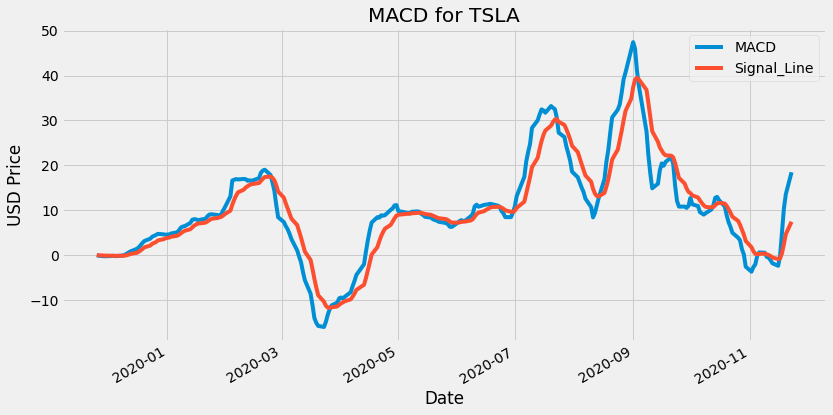

In [45]:
# Plot the charts
# Create a list of columns to keep
column_list = ['MACD', 'Signal_Line']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('MACD for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

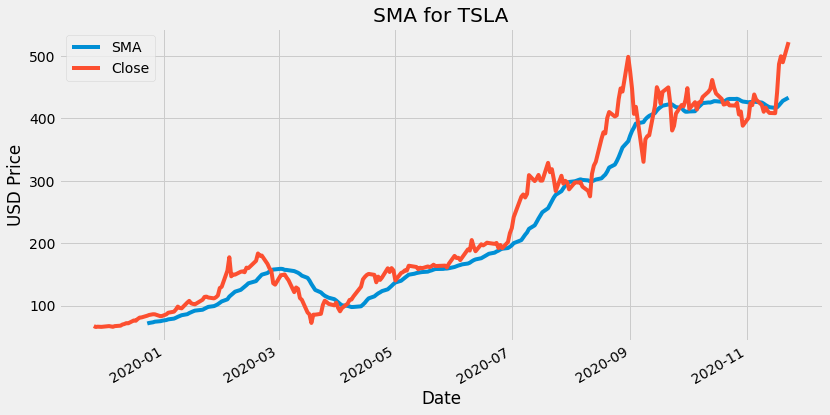

In [46]:
# Plot the charts
# Create a list of columns to keep
column_list = ['SMA', 'Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('SMA for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

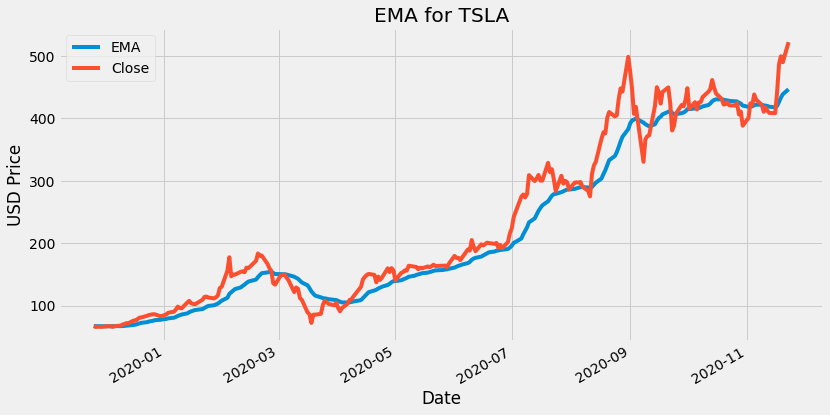

In [47]:
# Plot the charts
# Create a list of columns to keep
column_list = ['EMA', 'Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('EMA for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

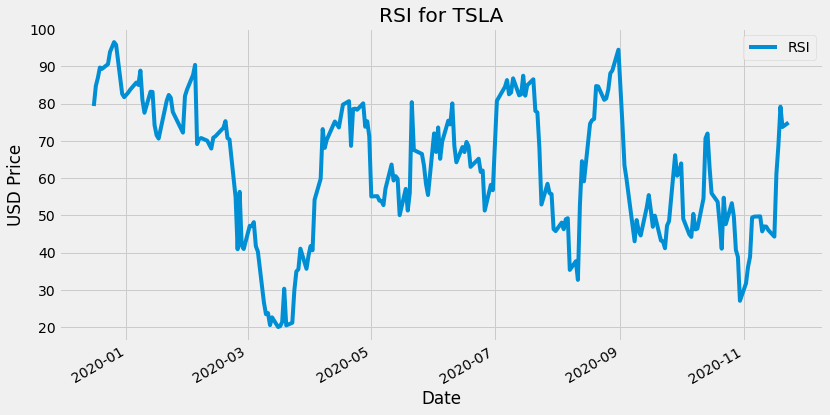

In [48]:
# Plot the charts
# Create a list of columns to keep
column_list = ['RSI']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('RSI for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()